In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
training = pd.read_csv("train.csv")
testing = pd.read_csv("test.csv")

In [4]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
pd.isnull(training).sum()
pd.isnull(testing).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

In [7]:
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 

In [8]:
training.groupby(["Embarked"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,,
C,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644


In [9]:
training["Embarked"].fillna("S", inplace = True)

In [11]:
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

In [12]:
pd.isnull(training).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [13]:
pd.isnull(testing).sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

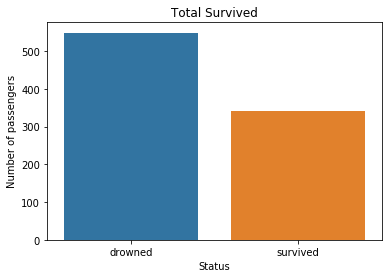

In [14]:
sns.countplot(x='Survived',data=training)
plt.xticks(np.arange(2), ['drowned', 'survived'])
plt.title("Total Survived")
plt.xlabel('Status')
plt.ylabel('Number of passengers')
plt.show()

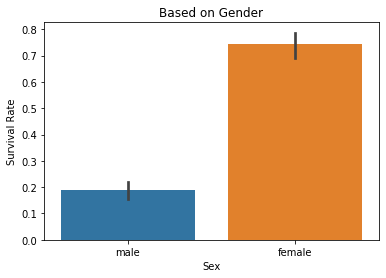

In [15]:
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Based on Gender")
plt.ylabel('Survival Rate')
plt.show()

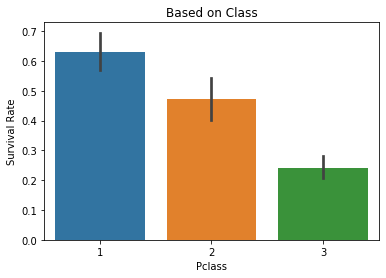

In [16]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Based on Class")
plt.show()

Text(0.5, 1.0, 'Based on Gender and Class')

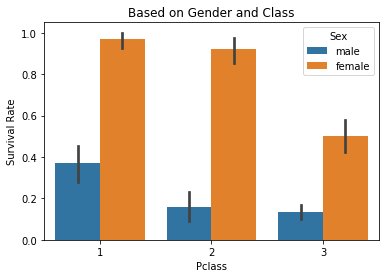

In [17]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Based on Gender and Class")

Text(0.5, 1.0, 'Based on Gender and Class')

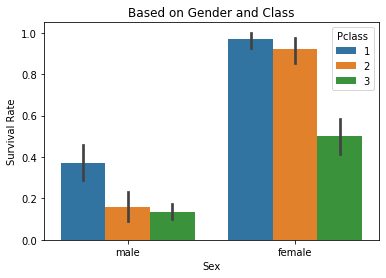

In [18]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Based on Gender and Class")

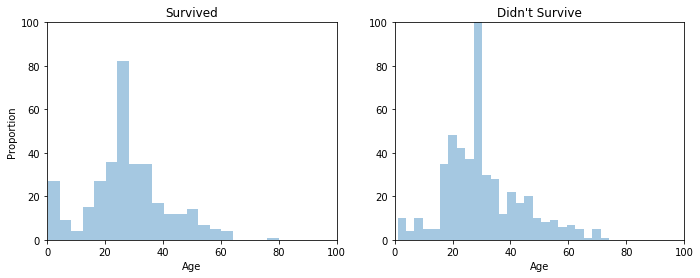

In [19]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.6)
plt.show()

In [20]:
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2

In [21]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [22]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

training.groupby(["Title"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
Title,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2,2,2
Countess,1,1,1,1,1,1,1,1,1,1,1,1
Don,1,1,1,1,1,1,1,1,1,1,1,1
Dr,7,7,7,7,7,7,7,7,7,7,7,7
Jonkheer,1,1,1,1,1,1,1,1,1,1,1,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,40,40,40,40,40,40,40


In [23]:
training.replace(to_replace = ["Capt", "Col", "Countess", "Don", "Jonkheer",
                               "Lady", "Major", "Mlle", "Mme", "Ms", "Sir"],
                 value = "Others", inplace = True)

testing.replace(to_replace = ["Capt", "Col", "Countess", "Don", "Jonkheer",
                               "Lady", "Major", "Mlle", "Mme", "Ms", "Sir", "Dona"],
                 value = "Others", inplace = True)

training.groupby(["Title"]).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone
Title,,,,,,,,,,,,
Dr,7,7,7,7,7,7,7,7,7,7,7,7
Master,40,40,40,40,40,40,40,40,40,40,40,40
Miss,182,182,182,182,182,182,182,182,182,182,182,182
Mr,517,517,517,517,517,517,517,517,517,517,517,517
Mrs,125,125,125,125,125,125,125,125,125,125,125,125
Others,14,14,14,14,14,14,14,14,14,14,14,14
Rev,6,6,6,6,6,6,6,6,6,6,6,6


In [24]:
from sklearn.preprocessing import LabelEncoder

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

In [25]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

In [27]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1) 
y_train = training["Survived"]
X_test = testing.drop("PassengerId", axis=1)

In [28]:
from sklearn.model_selection import train_test_split 

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_training, y_training)

Y_pred = random_forest.predict(X_valid)

In [30]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_valid,Y_pred)
print(acc)

0.8379888268156425
